Iris Dataset


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
col_names = ['SepalLengthCm','	SepalWidthCm','	PetalLengthCm','	PetalWidthCm']
df = pd.read_csv('/content/Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
feature_cols =['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X=df[feature_cols]
y=df.Species

In [ ]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

Fit and Predict

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

Evaluation

In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
# print("recall:",metrics.recall_score(y_test,y_pred),average='micro')
# print("precision:",metrics.precision_score(y_test,y_pred))


accuracy: 0.9555555555555556


Visualization


In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

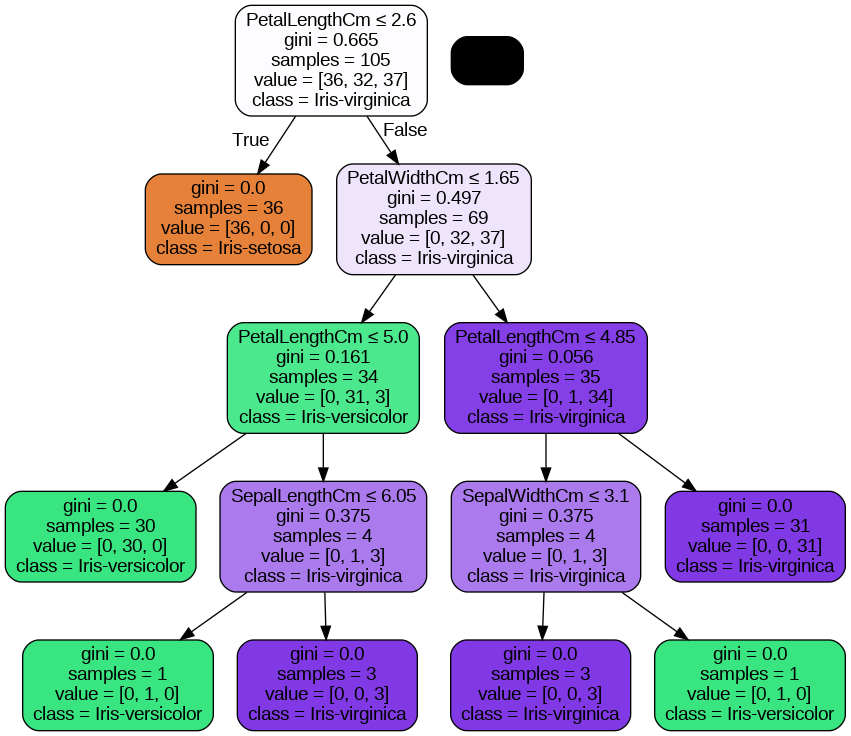

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(clf,out_file = dot_data,
                filled = True,rounded = True,
                special_characters=True,feature_names=feature_cols,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

Decision Tree made using the GINI Index method. Each node if further classisfied on the basis of its purity. This is a Decision Tree Classifier method.

In [ ]:
clf1 = DecisionTreeClassifier(criterion = 'entropy')

In [ ]:
clf1 = clf1.fit(X_train,y_train)

In [ ]:
y_pred = clf1.predict(X_test)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.9555555555555556


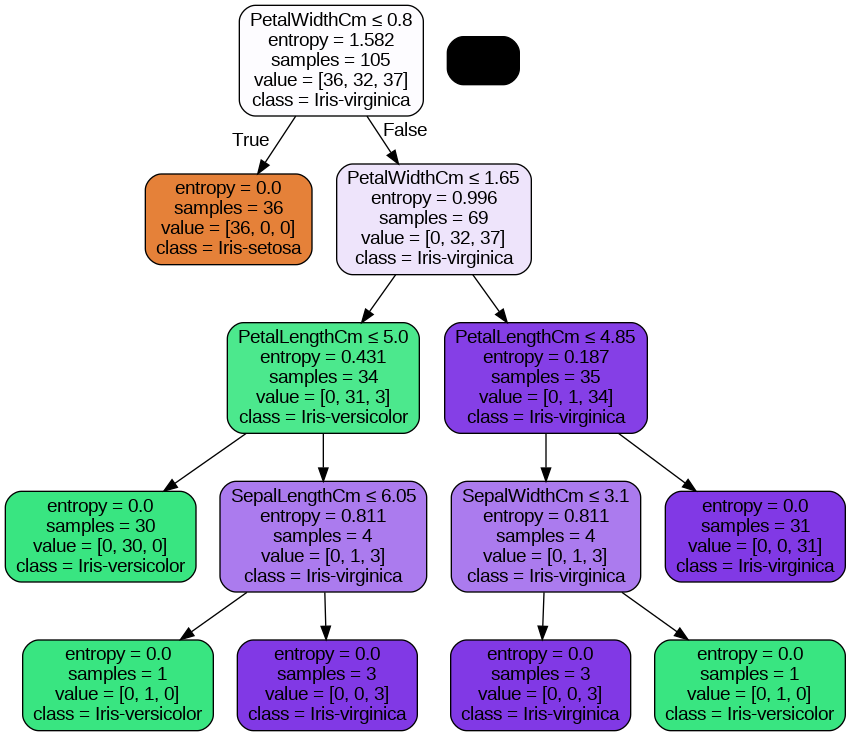

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(clf1,out_file = dot_data,
                filled = True,rounded = True,
                special_characters=True,feature_names=feature_cols,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris2.png')
Image(graph.create_png())

Decision Tree made using the Entropy(ID3 Algorithm). Each node if further classisfied on the basis of how much information is gained. This is a Decision Tree Classifier method.

Overfitting

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from matplotlib import pyplot as plt

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 10000, n_features =20, n_informative = 5, n_redundant=15, random_state=42)
print(X.shape,y.shape)

(10000, 20) (10000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [ ]:
print("Test Accuracy:",metrics.accuracy_score(y_test,y_pred))

Test Accuracy: 0.919


In [ ]:
print("Train Accuracy:", clf2.score(X_train,y_train))

Train Accuracy: 1.0


In [ ]:
train_scores = []
test_scores = []
values = [i for i in range(1,21)]
for i in values:
  print(f"Max depth:{i}")
  model = DecisionTreeClassifier(max_depth=i, criterion="entropy")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  test_scores.append(metrics.accuracy_score(y_test,y_pred))
  train_scores.append(model.score(X_train,y_train))

  print("Test Accuracy:", metrics.accuracy_score(y_test,y_pred))
  print("Train Accuracy:", model.score(X_train,y_train))

Max depth:1
Test Accuracy: 0.773
Train Accuracy: 0.7778571428571428
Max depth:2
Test Accuracy: 0.839
Train Accuracy: 0.8455714285714285
Max depth:3
Test Accuracy: 0.8606666666666667
Train Accuracy: 0.8694285714285714
Max depth:4
Test Accuracy: 0.8786666666666667
Train Accuracy: 0.8972857142857142
Max depth:5
Test Accuracy: 0.883
Train Accuracy: 0.9035714285714286
Max depth:6
Test Accuracy: 0.911
Train Accuracy: 0.9251428571428572
Max depth:7
Test Accuracy: 0.9183333333333333
Train Accuracy: 0.9371428571428572
Max depth:8
Test Accuracy: 0.9183333333333333
Train Accuracy: 0.9444285714285714
Max depth:9
Test Accuracy: 0.922
Train Accuracy: 0.955
Max depth:10
Test Accuracy: 0.925
Train Accuracy: 0.9662857142857143
Max depth:11
Test Accuracy: 0.919
Train Accuracy: 0.973
Max depth:12
Test Accuracy: 0.9236666666666666
Train Accuracy: 0.9812857142857143
Max depth:13
Test Accuracy: 0.9243333333333333
Train Accuracy: 0.9862857142857143
Max depth:14
Test Accuracy: 0.926
Train Accuracy: 0.991
Max 

After Depth 10 of classification , model is not learning any data it is only learning noise and hence is said to be overfitting after depth 10.

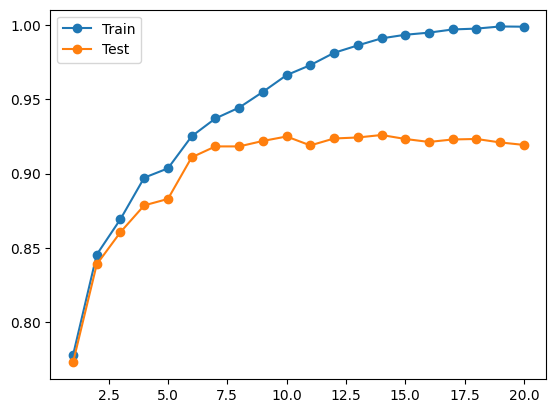

In [ ]:
pyplot.plot(values,train_scores,'-o',label='Train')
pyplot.plot(values,test_scores,'-o',label='Test')
pyplot.legend()
pyplot.show()

Breast Cancer Dataset

In [ ]:
df2 = pd.read_csv('/content/Breast_cancer_data.csv')
df2.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
df2['diagnosis'].unique()

array([0, 1])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
df2.shape

(569, 6)

In [ ]:
df2.isnull()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
564,False,False,False,False,False,False
565,False,False,False,False,False,False
566,False,False,False,False,False,False
567,False,False,False,False,False,False


In [ ]:
df2.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
X = df2.drop('diagnosis', axis=1)
y = df2['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from matplotlib import pyplot as plt

In [ ]:
print("Train Accuracy:",model.score(X_train , y_train))
print("Test Accuracy:",metrics.accuracy_score(y_test , y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.9239766081871345


In [ ]:
train_scores = []
test_scores = []
values = [i for i in range(1,21)]
for i in values:
  print(f"Max depth:{i}")
  model = DecisionTreeClassifier(max_depth=i, criterion="entropy")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  test_scores.append(metrics.accuracy_score(y_test,y_pred))
  train_scores.append(model.score(X_train,y_train))

  print("Test Accuracy:", metrics.accuracy_score(y_test,y_pred))
  print("Train Accuracy:", model.score(X_train,y_train))

Max depth:1
Test Accuracy: 0.8654970760233918
Train Accuracy: 0.8793969849246231
Max depth:2
Test Accuracy: 0.8654970760233918
Train Accuracy: 0.8793969849246231
Max depth:3
Test Accuracy: 0.9005847953216374
Train Accuracy: 0.914572864321608
Max depth:4
Test Accuracy: 0.8654970760233918
Train Accuracy: 0.9447236180904522
Max depth:5
Test Accuracy: 0.8947368421052632
Train Accuracy: 0.9522613065326633
Max depth:6
Test Accuracy: 0.8947368421052632
Train Accuracy: 0.9673366834170855
Max depth:7
Test Accuracy: 0.8771929824561403
Train Accuracy: 0.9849246231155779
Max depth:8
Test Accuracy: 0.8771929824561403
Train Accuracy: 0.9874371859296482
Max depth:9
Test Accuracy: 0.8771929824561403
Train Accuracy: 0.9974874371859297
Max depth:10
Test Accuracy: 0.8771929824561403
Train Accuracy: 1.0
Max depth:11
Test Accuracy: 0.8771929824561403
Train Accuracy: 1.0
Max depth:12
Test Accuracy: 0.8713450292397661
Train Accuracy: 1.0
Max depth:13
Test Accuracy: 0.8771929824561403
Train Accuracy: 1.0
Max 

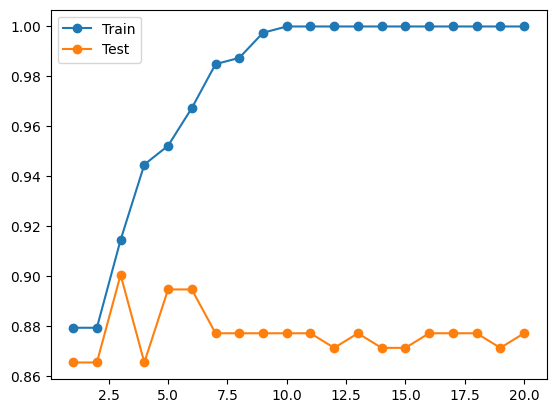

In [ ]:
pyplot.plot(values,train_scores,'-o',label='Train')
pyplot.plot(values,test_scores,'-o',label='Test')
pyplot.legend()
pyplot.show()

After Depth 3 of classification there is a sharp decrease in the testing accuracy hence ut can be concluded that model is not learning any data it is only learning noise and hence is said to be overfitting after depth 3.

In [ ]:
import pandas as pd
import numpy as np

Car Prediction


In [ ]:
df3 = pd.read_csv('/content/carprediction.csv')
df3.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df3.shape

(11914, 16)

In [ ]:
df3.isnull()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df3.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
df3["Vehicle Size"].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [ ]:
df3['Make'].value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

In [ ]:
#dropping all vlaues that have an object data-type
df3.drop(['Make','Model','Year','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style'],axis=1,inplace=True)
df3.head()

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,335.0,6.0,2.0,26,19,3916,46135
1,300.0,6.0,2.0,28,19,3916,40650
2,300.0,6.0,2.0,28,20,3916,36350
3,230.0,6.0,2.0,28,18,3916,29450
4,230.0,6.0,2.0,28,18,3916,34500


In [ ]:
#dropping null values and finally checking if any NA values are missed
#also checking colliding datatypes of the attributes(here all attrubutes are now integer type)
df3.dropna(inplace=True)
df3.isna().sum()

Engine HP           0
Engine Cylinders    0
Number of Doors     0
highway MPG         0
city mpg            0
Popularity          0
MSRP                0
dtype: int64

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
from matplotlib import pyplot as plt

In [ ]:
X = df3.drop('MSRP', axis=1)
y = df3['MSRP']

In [ ]:
from sklearn import metrics

In [ ]:
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=21)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Train Accuracy:",model.score(X_train , y_train))
print("Test Accuracy:",model.score(X_test , y_test))

Train Accuracy: 1.0
Test Accuracy: 0.689101424239559


In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 9661.596093702257


The perfect accuracy on the training set could be a sign of overfitting.
The relatively low test accuracy and high MSE indicate that the model might not be performing well on unseen data.

In [ ]:
train_scores = []
test_scores = []
values = [i for i in range(1,101,10)]
for i in values:
  print(f"Max depth:{i}")
  model = DecisionTreeRegressor(max_depth=i, criterion="squared_error")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  test_scores.append(model.score(X_test,y_test))
  train_scores.append(model.score(X_train,y_train))

  print("Test Accuracy:", model.score(X_test,y_test))
  print("Train Accuracy:", model.score(X_train,y_train))

Max depth:1
Test Accuracy: 0.22793445687965663
Train Accuracy: 0.24396344511964763
Max depth:11
Test Accuracy: 0.6914183697889891
Train Accuracy: 0.996128706864931
Max depth:21
Test Accuracy: 0.6727661169168555
Train Accuracy: 1.0
Max depth:31
Test Accuracy: 0.6796970713600665
Train Accuracy: 1.0
Max depth:41
Test Accuracy: 0.6672701683304286
Train Accuracy: 1.0
Max depth:51
Test Accuracy: 0.6663886698776099
Train Accuracy: 1.0
Max depth:61
Test Accuracy: 0.6750751887925499
Train Accuracy: 1.0
Max depth:71
Test Accuracy: 0.6927947344856807
Train Accuracy: 1.0
Max depth:81
Test Accuracy: 0.6649239372107512
Train Accuracy: 1.0
Max depth:91
Test Accuracy: 0.6780754149767128
Train Accuracy: 1.0


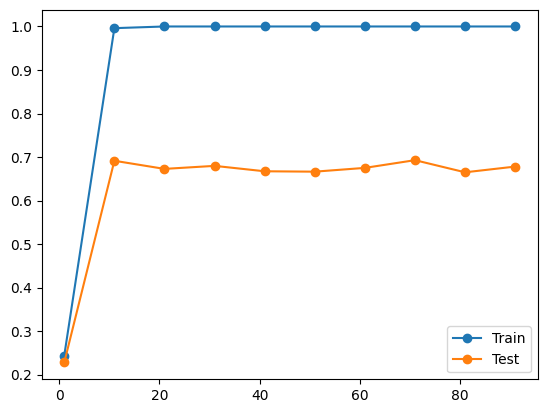

In [ ]:
pyplot.plot(values,train_scores,'-o',label='Train')
pyplot.plot(values,test_scores,'-o',label='Test')
pyplot.legend()
pyplot.show()

This implementation was an example of Decision Tree Regressor.
The perfect training accuracy shows how a model might work and learn well on a training dataset but when tried on unseen data fails to show accuracy(High MSE), hinting to overfitting.